#  2 - Qual é a relação entre o tempo de entrega e a satisfação do cliente?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Carregar os dados
df_pedidos = pd.read_csv(r'C:\Users\55119\OneDrive\Área de Trabalho\REPROGRAMA (On33)\Semana14\on33-python-s14-analise-de-dados\material\dados\olist_orders_dataset.csv')

In [4]:
df_clientes = pd.read_csv(r'C:\Users\55119\OneDrive\Área de Trabalho\REPROGRAMA (On33)\Semana14\on33-python-s14-analise-de-dados\material\dados\olist_customers_dataset.csv')
df_clientes.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
df_avaliacoes = pd.read_csv(r'C:\Users\55119\OneDrive\Área de Trabalho\REPROGRAMA (On33)\Semana14\on33-python-s14-analise-de-dados\material\dados\olist_order_reviews_dataset.csv')
df_avaliacoes.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [24]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   data_pedido                    99441 non-null  datetime64[ns]
 4   data_entrega                   96476 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 4.6+ MB


In [25]:
# Converter o tipo da coluna para datetime
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])
df_pedidos['order_estimated_delivery_date'] = pd.to_datetime(df_pedidos['order_estimated_delivery_date'])
df_pedidos['order_delivered_carrier_date'] = pd.to_datetime(df_pedidos['order_delivered_carrier_date'])
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])

KeyError: 'order_purchase_timestamp'

In [26]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   data_pedido                    99441 non-null  datetime64[ns]
 4   data_entrega                   96476 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 4.6+ MB


In [27]:
df_pedidos.columns

Index(['order_id', 'customer_id', 'order_status', 'data_pedido',
       'data_entrega', 'order_estimated_delivery_date'],
      dtype='object')

In [28]:
df_clientes.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [13]:
df_avaliacoes.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [14]:
# Apagar colunas 
apagar_colunas = ['order_approved_at', 'order_delivered_carrier_date']
df_pedidos = df_pedidos.drop(apagar_colunas, axis=1)
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15


In [29]:
# Juntar as bases de dados
dados_completos = df_pedidos.merge(df_clientes, on='customer_id')
dados_completos = dados_completos.merge(df_avaliacoes, on='order_id')


In [16]:
# Renomear colunas
df_pedidos.rename(columns={
    'order_delivered_customer_date': 'data_entrega', 
    'order_purchase_timestamp' : 'data_pedido',
    'review_score': 'pontuacao_avaliacao'
    }, inplace=True)


In [17]:
df_pedidos.columns

Index(['order_id', 'customer_id', 'order_status', 'data_pedido',
       'data_entrega', 'order_estimated_delivery_date'],
      dtype='object')

In [20]:
dados_completos.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [30]:
# Calcular o tempo de entrega
dados_completos['tempo_entrega'] = (pd.to_datetime(dados_completos['data_entrega']) - pd.to_datetime(dados_completos['data_pedido'])).dt.days


In [31]:
print(dados_completos['review_score'].dtype)

int64


In [32]:
# Agrupar por pedido e calcular a média das avaliações e o tempo de entrega
analise_tempo_satisfacao = dados_completos.groupby('order_id').agg({
    'tempo_entrega': 'mean',
    'review_score': 'mean'
}).reset_index()


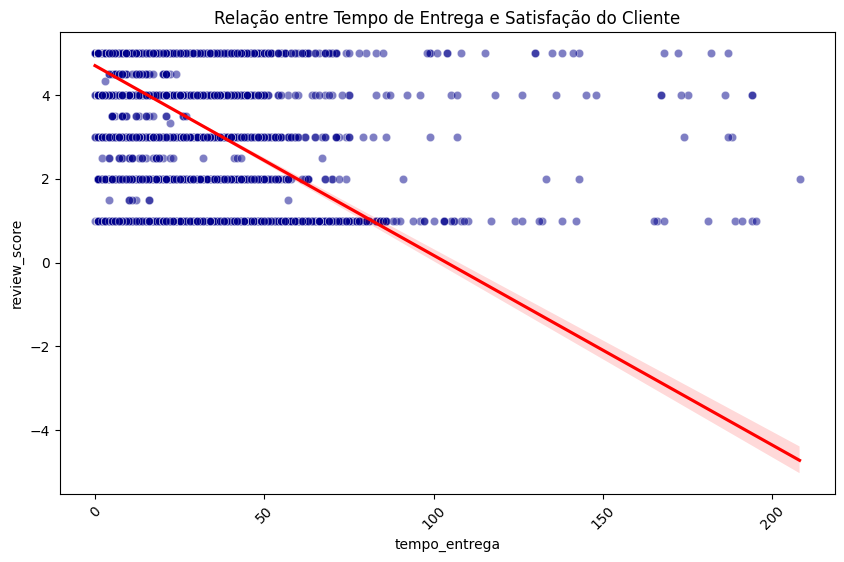

In [33]:
# Plotagem
plt.figure(figsize=(10, 6))
sns.scatterplot(data=analise_tempo_satisfacao, x='tempo_entrega', y='review_score', color='darkblue', alpha=0.5) #alpha controla a transparência dos pontinhos (melhor visualização quando tem sobreposição)
plt.title('Relação entre Tempo de Entrega e Satisfação do Cliente')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Média das Avaliações')
plt.xticks(rotation=45)
sns.regplot(x='tempo_entrega', y='review_score', data=analise_tempo_satisfacao, scatter=False, color='red') #para criar a linha de tendência
plt.show()

Podemos analisar que baseado na linha em destaque, os Clientes se tornam menos satisfeitos conforme o tempo de entrega aumenta.

In [34]:
# Exportando a base final
analise_tempo_satisfacao.to_csv('final_satisfacao_entrega.csv', index=False)